version list : ['m1_t1_lr0.0001', 'm1_t1_lr0.0002', 'version_default']

version : m1_t1_lr0.0001

INFO | 2019.01.19 - 16h:12m:56s
INFO | main.py --gpu 2 --num_epoch 40 --lr 0.0001 --show_loss_term 30 --batch_size 32 --version m1_t1
INFO |  -------------------- setting --------------------
INFO |     version : m1_t1
INFO |     model save path : saved_model/
INFO |     gpu : 2
INFO |     number of epochs : 40
INFO |     batch size : 32
INFO |     learning rate : 0.0001
INFO |     data path : dataset/
INFO |  -------------------- setting --------------------


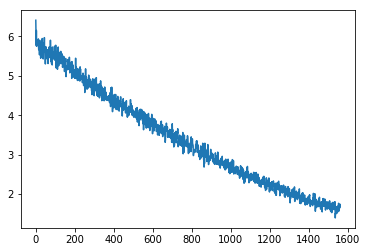

INFO |  ------- model training start -------
INFO |     epoch 1/40 done | avg.loss : 5.82147
INFO |     epoch 2/40 done | avg.loss : 5.65601
INFO |     epoch 3/40 done | avg.loss : 5.60199
INFO |     epoch 4/40 done | avg.loss : 5.53291
INFO |     epoch 5/40 done | avg.loss : 5.44793
INFO |     epoch 6/40 done | avg.loss : 5.34318
INFO |     epoch 7/40 done | avg.loss : 5.24814
INFO |     epoch 8/40 done | avg.loss : 5.13438
INFO |     epoch 9/40 done | avg.loss : 5.01896
INFO |     epoch 10/40 done | avg.loss : 4.92385
INFO |     epoch 11/40 done | avg.loss : 4.81491
INFO |     epoch 12/40 done | avg.loss : 4.70817
INFO |     epoch 13/40 done | avg.loss : 4.62492
INFO |     epoch 14/40 done | avg.loss : 4.52570
INFO |     epoch 15/40 done | avg.loss : 4.44746
INFO |     epoch 16/40 done | avg.loss : 4.36745
INFO |     epoch 17/40 done | avg.loss : 4.28217
INFO |     epoch 18/40 done | avg.loss : 4.21004
INFO |     epoch 19/40 done | avg.loss : 4.13349
INFO |     epoch 20/40 done | avg

In [121]:
import os
versions = os.listdir('log')
for i, item in enumerate(versions):
    versions[i] = item[:-4]

version = versions[0]
print('version list : {}'.format(versions))
print()
print('version : {}'.format(version))
print()

%matplotlib inline
import matplotlib.pyplot as plt
path = 'log/'+version+'.log'
with open(path,'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if '------- model training start -------' in line :
        idx = i
        break
    if line.strip() == 'INFO |':
        pass
    else:
        print(line.strip())

xs = []
ys = []
flag = 0

j=1
for i,line in enumerate(lines):
    if i<idx:
        continue
    if 'DEBUG' not in line:
        continue
    if 'completed' in line :
        break
    xs.append(j)
    ys.append(float(line.split()[-1]))
    j+=1
        
#plt.scatter(xs,ys)
plt.plot(xs,ys)
plt.show()

for i,line in enumerate(lines):
    if '------- model training start -------' in line:
        print(line.strip())
    if 'done' in line:
        print(line.strip())
    if 'completed' in line:
        print(line.strip())

In [27]:
import json
json_path='dataset/data.json'
json_data = json.loads(open(json_path).read())

In [22]:
json_data['class']

{'w_f48451c': 0,
 'w_c3d896a': 1,
 'w_20df2c5': 2,
 'new_whale': 3,
 'w_dd88965': 4,
 'w_64404ac': 5,
 'w_a6f9d33': 6,
 'w_581ba42': 7,
 'w_cb622a2': 8,
 'w_d3b46e7': 9,
 'w_8cad422': 10,
 'w_13ae3d4': 11,
 'w_3de579a': 12,
 'w_1d0830e': 13,
 'w_2ba6978': 14,
 'w_8dddbee': 15,
 'w_2365d55': 16,
 'w_3879fa0': 17,
 'w_9c506f6': 18,
 'w_8a6a8d5': 19,
 'w_662530e': 20,
 'w_a8b34a0': 21,
 'w_c0d11da': 22,
 'w_50e8d58': 23,
 'w_3881f28': 24,
 'w_9ad3551': 25,
 'w_cee684e': 26,
 'w_41d24c6': 27,
 'w_8a235b6': 28,
 'w_2e231f4': 29,
 'w_6822dbc': 30,
 'w_df86a42': 31,
 'w_700ebb4': 32,
 'w_d892cd9': 33,
 'w_7a4b2f9': 34,
 'w_bc285a6': 35,
 'w_c70fbcd': 36,
 'w_778e474': 37,
 'w_f3252ff': 38,
 'w_2df85e7': 39,
 'w_c7cda47': 40,
 'w_62bb54b': 41,
 'w_c6c89db': 42,
 'w_1531bf5': 43,
 'w_4e1e04d': 44,
 'w_d6ca28d': 45,
 'w_1260eb5': 46,
 'w_fccccec': 47,
 'w_acd217a': 48,
 'w_5650932': 49,
 'w_c98aaad': 50,
 'w_dd944b7': 51,
 'w_6f0cbe3': 52,
 'w_6cfa650': 53,
 'w_6e209a8': 54,
 'w_1ea5d96': 55,
 '

In [20]:
json_data['train']

[['0000e88ab.jpg', 'w_f48451c', 0],
 ['0001f9222.jpg', 'w_c3d896a', 1],
 ['00029d126.jpg', 'w_20df2c5', 2],
 ['00050a15a.jpg', 'new_whale', 3],
 ['0005c1ef8.jpg', 'new_whale', 3],
 ['0006e997e.jpg', 'new_whale', 3],
 ['000a6daec.jpg', 'w_dd88965', 4],
 ['000f0f2bf.jpg', 'new_whale', 3],
 ['0016b897a.jpg', 'w_64404ac', 5],
 ['001c1ac5f.jpg', 'w_a6f9d33', 6],
 ['001cae55b.jpg', 'w_581ba42', 7],
 ['001d7450c.jpg', 'new_whale', 3],
 ['00200e115.jpg', 'new_whale', 3],
 ['00245a598.jpg', 'new_whale', 3],
 ['002b4615d.jpg', 'new_whale', 3],
 ['002f99f01.jpg', 'new_whale', 3],
 ['00355ff28.jpg', 'w_cb622a2', 8],
 ['00357e37a.jpg', 'w_d3b46e7', 9],
 ['003795857.jpg', 'new_whale', 3],
 ['0041880bf.jpg', 'new_whale', 3],
 ['0043da555.jpg', 'new_whale', 3],
 ['00442c882.jpg', 'w_8cad422', 10],
 ['00464ff65.jpg', 'new_whale', 3],
 ['004775679.jpg', 'w_13ae3d4', 11],
 ['004ae9e26.jpg', 'new_whale', 3],
 ['004c0f43b.jpg', 'new_whale', 3],
 ['004e8ad5b.jpg', 'w_3de579a', 12],
 ['004f87702.jpg', 'w_1d0

In [5]:
import pandas as pd
train_csv_path = 'dataset/train.csv'
csv_data = pd.read_csv(train_csv_path)

In [14]:
csv_data['Id'].unique()

array(['w_f48451c', 'w_c3d896a', 'w_20df2c5', ..., 'w_2807565',
       'w_17a108a', 'w_9f30885'], dtype=object)

In [118]:
import pandas as pd

submission_data_path = 'submission/'+version+'.csv'
submission_data = pd.read_csv(submission_data_path)


In [119]:
submission_data

,Image,Id
0,38d64079c.jpg,w_97ba78a w_3f0fd95 w_60c073b w_fc230fd w_3d1f606
1,679f798b4.jpg,w_171dc55 w_26923f7 w_a79e4fc w_f77e282 w_c0c4587
2,984de26cc.jpg,w_7122684 w_eec42d0 w_b34830b w_d0728b9 w_bdb3a05
3,162ecd9d9.jpg,w_2ba6978 w_814a1cc w_8fda8b2 w_f737a6c w_1f78a1e
4,7cf1cb2a4.jpg,w_f4f3715 w_b34830b w_bef2a3f w_37bdff9 w_3d1f606
5,1420db2ca.jpg,w_4e1e04d w_1260eb5 w_acd217a w_b44e89d w_dd00c66
6,b8cf925bf.jpg,w_c3d896a w_20df2c5 w_dd88965 w_64404ac w_a6f9d33
7,f19c73261.jpg,w_62bb54b w_4e1e04d w_acd217a w_4f3cebf w_e04d084
8,85e4d3922.jpg,w_3b955d1 w_1e283bb w_7cc7ec6 w_3f0fd95 w_faad3f8
9,7efc384cb.jpg,w_7a91862 w_5010896 w_a70b90b w_fd99c63 w_fee1e3e
